In [6]:
# load the human-judgements file
import os, json

# Path to the uploaded file
results_dir = '../competition/NIST_data/'
file_paths = [
    'final.citation_judgments_Webassess.20241031.jsonl', 
    'final.citation_judgments_with_prediction.20241025.jsonl',
    'final.citation_judgments_without_prediction.20241025.jsonl'
]

# Initialize an empty list to store each row's JSON data
# human_citation_data -> topics -> run_id -> json_data (results)
human_citation_data = {}

# Open the file and read line by line
for filepath in file_paths:
    file_path = os.path.join(results_dir, filepath)
    with open(file_path, 'r') as file:
        for idx, line in enumerate(file):
            json_data = json.loads(line)
            run_id = json_data['run_id']
            topic_id = json_data['topic_id']

            if topic_id not in human_citation_data:
                human_citation_data[topic_id] = {run_id: json_data}
            else:
                human_citation_data[topic_id][run_id] = json_data

In [9]:
print('Number of topics:', len(human_citation_data)) # topic ids which is 36
print('Number of runs:', len(human_citation_data['2024-219624'])) # run ids which is 42 for this topic-id

Number of topics: 36
Number of runs: 42


In [10]:
RUNFILES = {
    "auggen": set([
        "ldisnu.ldilab_gpt_4o",
        "IIIA-UNIPD.iiia_dedup_p1_straight_ag",
        "IIIA-UNIPD.iiia_standard_p1_straight_ag",
        "softbank-meisei.agtask-bm25-colbert_faiss-gpt4o-llama70b",
        "CIR.cir_gpt-4o-mini_Cosine_50_0.5_100_301_p1",
        "CIR.cir_gpt-4o-mini_no_reranking_50_0.5_100_301_p1",
        "KML.gpt_mini",
        "KML.cohere+post_processing",
        "uis-iai.ginger_top_5",
        "uis-iai.baseline_top_5",
        "TREMA-UNH.Enhanced_Iterative_Fact_Refinement_and_Prioritization",
        "TREMA-UNH.Ranked_Iterative_Fact_Extraction_and_Refinement",
        "IITD-IRL.ag_rag_gpt35_expansion_rrf_20",
        "coordinators.baseline_rag24.test_l31_70b_instruct_top20",
    ]),
    "gen": set([
        "ldisnu.dilab_repllama_listt5_pass3_gpt4o",
        "WaterlooClarke.UWCgarag",
        "WaterlooClarke.UWCrag",
        "buw.oneshot_post_sentenced",
        "buw.buw",
        "citi.BEST_cot_gpt3.5",
        "citi.SECOND_cot_gpt3.5",
        "ielab.ielab-b70bf-70bqp-70bafs",
        "ielab.ielab-b70bf-70bqfs-ad_hoc",
        "ii_research.iiresearch-bm25-top10-llama3-8b-instruct",
        "InfoLab.UDInfolab.RAG.Query",
        "InfoLab.UDInfolab.RAG.AnsAI",
        "IRIT.ISIR-IRIT-zephyr_p2",
        "IRIT.ISIR-IRIT-zephyr_query_gen",
        "ncsu-las.LAS-splade-mxbai-rrf-mmr8",
        "ncsu-las.LAS-splade-mxbai-mmr8-RAG",
        "neu.neurag",
        "neu.neuragfix",
        "Ruc01.ruc001",
        "SGU.qrant_bge_gemini",
        "softbank-meisei.rag_bm25-colbert_faiss-gpt4o-llama70b",
        "webis.webis-rag-run0-taskrag",
        "webis.webis-rag-run1-taskrag",
        "IITD-IRL.zeph_test_rag_rrf_expand_query",
        "uog-tht.FT-llama3",
        "uog-tht.ICL-mistral",
        "coordinators.baseline_frag_rag24.test_gpt-4o_top20",
        "coordinators.baseline_frag_rag24.test_command-r-plus_top20",
        "h2oloo.listgalore_gpt4o_ragnarokv4_top20",
        "h2oloo.listgalore_l31-70b_ragnarokv4_top20",
    ])
}

all_run_ids = list(RUNFILES['auggen'].union(RUNFILES['gen']))

In [11]:
# Load synthetic judgements by LLM
llm_results_directory = "/store/scratch/n3thakur/trec-rag-2024/trec2024-rag/support_eval/results/support/"

# llm_citation_data -> topics -> run_id -> json_data (results)
llm_citation_data = {}

topic_ids = list(set(human_citation_data.keys()))

for task in ["auggen", "gen"]:
    runfiles = RUNFILES[task]

    for runfile in runfiles:
        with open(os.path.join(llm_results_directory, task, "pairwise", f"{runfile}.jsonl"), "r") as file:
            for idx, line in enumerate(file):
                json_data = json.loads(line)
                json_data['sentences'] = json_data['support_eval']
                del json_data['support_eval']
                
                topic_id = json_data['topic_id']
                if topic_id in topic_ids:
                    if topic_id not in llm_citation_data:
                        llm_citation_data[topic_id] = {runfile: {"topic_id": topic_id, "run_id": runfile, "sentences": json_data["sentences"], "references": json_data["references"]}}
                    else:
                        llm_citation_data[topic_id][runfile] = {"topic_id": topic_id, "run_id": runfile, "sentences": json_data["sentences"], "references": json_data["references"]}

In [13]:
print('Number of topics:', len(llm_citation_data)) # topic ids which is 36
print('Number of runs:', len(llm_citation_data['2024-219624'])) # run ids which is 44 for this topic-id

Number of topics: 36
Number of runs: 44


In [15]:
# load the without prediction data loaders
import csv

topic_ids = []
# with open("../competition/NIST_data/citation_topics_with_prediction.20241025", "r") as f:
#     reader = csv.reader(f, delimiter="\t")
#     for row in reader:
#         topic_ids.append(row[0])

# this both topics are without prediction, i.e., fully manual condition topics -- 22 in total
with open("../competition/NIST_data/citation_topics_without_prediction.20241025", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for row in reader:
        topic_ids.append(row[0])

with open("../competition/NIST_data/citation_topics_Webassess.20241031", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for row in reader:
        topic_ids.append(row[0])

In [16]:
len(topic_ids)

22

In [27]:
import scipy.stats as stats
# Create a scatter plot of the human vs llm scores
import matplotlib.pyplot as plt
import random

human_output_dir = "../competition/results/human/@/merged"
llm_output_dir = "../competition/results/llm_pred/@/merged"

METRIC_NAMES = {
    "weighted_precision": "Weighted Precision",
    "hard_precision": "Hard Precision",
    "weighted_recall": "Weighted Recall",
    "hard_recall": "Hard Recall"
}

In [35]:
random.sample(list(RUNFILES[task]), 1)

['IIIA-UNIPD.iiia_standard_p1_straight_ag']

Metric: weighted_precision, Run: uis-iai.baseline_top_5
Metric: weighted_precision, Run: ldisnu.ldilab_gpt_4o
Metric: weighted_precision, Run: CIR.cir_gpt-4o-mini_Cosine_50_0.5_100_301_p1
Metric: weighted_precision, Run: KML.cohere+post_processing
Metric: weighted_precision, Run: IIIA-UNIPD.iiia_standard_p1_straight_ag
Metric: weighted_precision, Run: softbank-meisei.agtask-bm25-colbert_faiss-gpt4o-llama70b
Metric: weighted_precision, Run: CIR.cir_gpt-4o-mini_no_reranking_50_0.5_100_301_p1
Metric: weighted_precision, Run: KML.gpt_mini
Metric: weighted_precision, Run: uis-iai.ginger_top_5
Metric: weighted_precision, Run: IIIA-UNIPD.iiia_dedup_p1_straight_ag
Metric: weighted_precision, Run: coordinators.baseline_rag24.test_l31_70b_instruct_top20
Metric: weighted_precision, Run: IITD-IRL.ag_rag_gpt35_expansion_rrf_20
Metric: weighted_precision, Run: TREMA-UNH.Enhanced_Iterative_Fact_Refinement_and_Prioritization
Metric: weighted_precision, Run: TREMA-UNH.Ranked_Iterative_Fact_Extraction_a

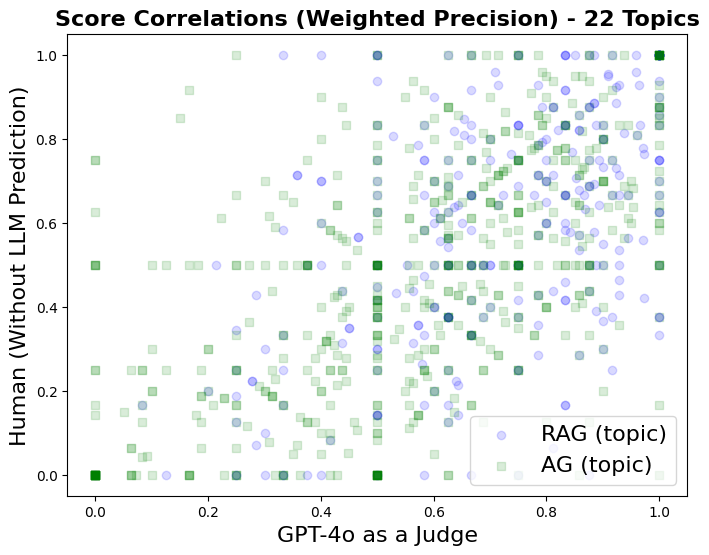

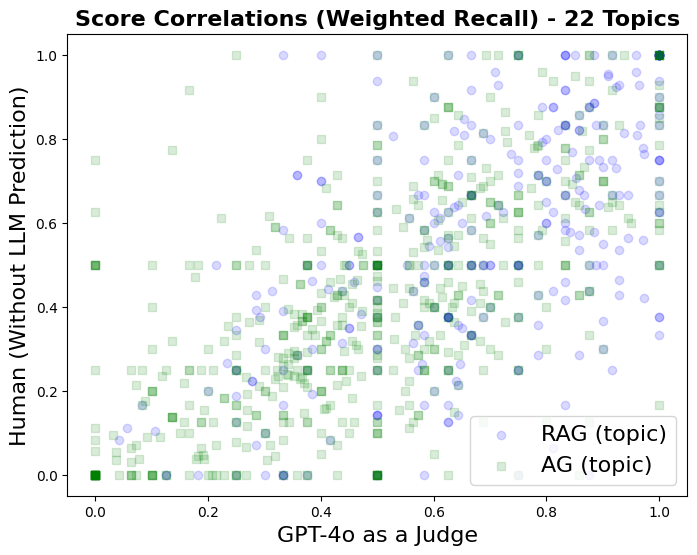

In [49]:
### Load the human + llm scores as we need to plot a scatter plot of the human vs llm scores
for metric in ["weighted_precision", "weighted_recall"]:
    # Create a scatter plot of the human vs llm scores
    plt.figure(figsize=(8, 6))

    # Load the human scores
    llm_prediction_runs = {run_id: {} for run_id in all_run_ids}
    human_runs = {run_id: {} for run_id in all_run_ids}
    scatter_x, scatter_y = {"auggen": [], "gen": []}, {"auggen": [], "gen": []}
    
    for task in ["auggen", "gen"]:
        for run_id in list(RUNFILES[task]):

            with open(f"{human_output_dir.replace('@', task)}/{run_id}.jsonl", "r") as f:
                for line in f:
                    data = json.loads(line)
                    human_runs[run_id][data["topic_id"]] = data[metric]
            
            with open(f"{llm_output_dir.replace('@', task)}/{run_id}.jsonl", "r") as f:
                for line in f:
                    data = json.loads(line)
                    llm_prediction_runs[run_id][data["topic_id"]] = data[metric]

            print(f"Metric: {metric}, Run: {run_id}")
            for topic_id in human_runs[run_id]:
                if topic_id in topic_ids:
                    # print(f"Topic: {topic_id}, Human: {human_runs[run_id][topic_id]}, LLM: {llm_prediction_runs[run_id][topic_id]}")
                    if run_id in human_citation_data[topic_id] and run_id in llm_citation_data[topic_id]:
                        scatter_y[task].append(human_runs[run_id][topic_id])
                        scatter_x[task].append(llm_prediction_runs[run_id][topic_id])

    plt.scatter(scatter_x["auggen"], scatter_y["auggen"], alpha=0.15, color="blue", label="RAG answer (topic)")
    plt.scatter(scatter_x["gen"], scatter_y["gen"], alpha=0.15, color="green", marker="s", label="AG answer (topic)")
    plt.legend(fontsize=16, loc="lower right")
    plt.xlabel("GPT-4o as a Judge", fontsize=16)
    plt.ylabel("Human (Without LLM Prediction)", fontsize=16)
    metric_name = METRIC_NAMES[metric]
    plt.title(f'Score Correlations ({metric_name}) - {len(topic_ids)} Topics', fontweight='bold', fontsize=16)

2024-143869
2024-213817
[[], [], [], [], [], []]
		Run ID: IRIT.ISIR-IRIT-zephyr_p2 not found for topic ID: 2024-213817 in human scores
		Run ID: IRIT.ISIR-IRIT-zephyr_p2 not found for topic ID: 2024-213817 in human scores
[[], [], [], [], [], []]
		Run ID: IRIT.ISIR-IRIT-zephyr_query_gen not found for topic ID: 2024-213817 in human scores
		Run ID: IRIT.ISIR-IRIT-zephyr_query_gen not found for topic ID: 2024-213817 in human scores
		Run ID: SGU.qrant_bge_gemini not found for topic ID: 2024-213817 in human & llm scores - no citations/missing
2024-29182
[[], [], [], [], [], []]
		Run ID: IRIT.ISIR-IRIT-zephyr_p2 not found for topic ID: 2024-29182 in human scores
		Run ID: IRIT.ISIR-IRIT-zephyr_p2 not found for topic ID: 2024-29182 in human scores
2024-214096
[[], [], [], [], [], []]
		Run ID: IRIT.ISIR-IRIT-zephyr_p2 not found for topic ID: 2024-214096 in human scores
		Run ID: IRIT.ISIR-IRIT-zephyr_p2 not found for topic ID: 2024-214096 in human scores
[[], [], [], [], [], []]
		Run ID

<Figure size 800x600 with 0 Axes>

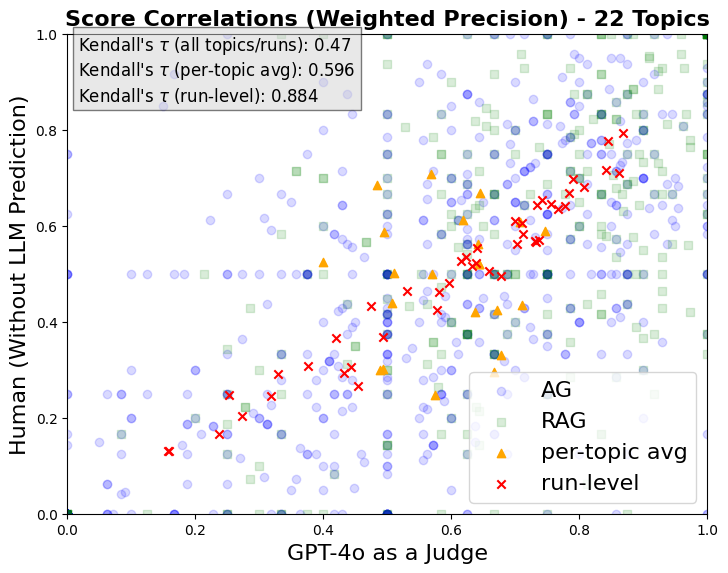

<Figure size 800x600 with 0 Axes>

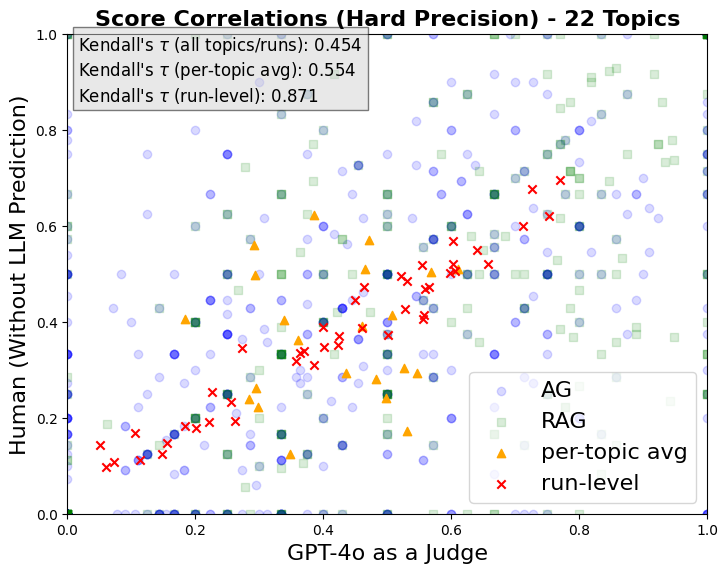

<Figure size 800x600 with 0 Axes>

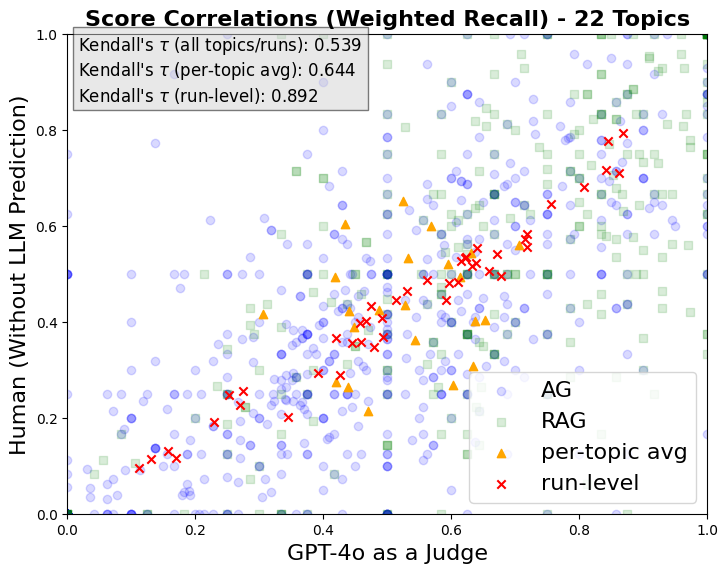

<Figure size 800x600 with 0 Axes>

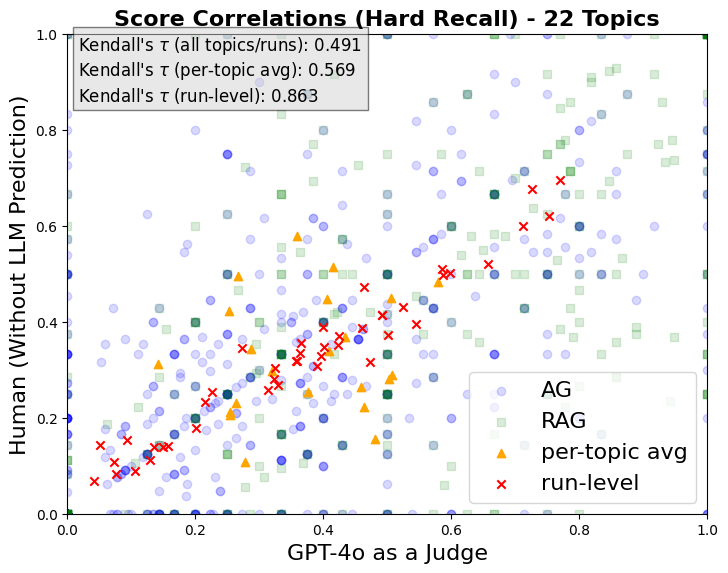

In [82]:
import scipy.stats as stats
# Create a scatter plot of the human vs llm scores
import matplotlib.pyplot as plt

human_output_dir = "../competition/results/human/@/merged"
llm_output_dir = "../competition/results/llm_pred/@/merged"

METRIC_NAMES = {
    "weighted_precision": "Weighted Precision",
    "hard_precision": "Hard Precision",
    "weighted_recall": "Weighted Recall",
    "hard_recall": "Hard Recall"
}

### Load the human + llm scores as we need to plot a scatter plot of the human vs llm scores
for metric in ["weighted_precision", "hard_precision", "weighted_recall", "hard_recall"]:
# for metric in ["weighted_precision"]:

    # Create a scatter plot of the human vs llm scores
    plt.figure(figsize=(8, 6))

    # Load the human scores
    llm_prediction_runs, human_runs = {}, {}
    for task in ["auggen", "gen"]:
        for run_id in RUNFILES[task]:
            
            if run_id not in llm_prediction_runs:
                llm_prediction_runs[run_id] = {}
            
            if run_id not in human_runs:
                human_runs[run_id] = {}

            with open(f"{human_output_dir.replace('@', task)}/{run_id}.jsonl", "r") as f:
                for line in f:
                    data = json.loads(line)
                    human_runs[run_id][data["topic_id"]] = data[metric]
            
            with open(f"{llm_output_dir.replace('@', task)}/{run_id}.jsonl", "r") as f:
                for line in f:
                    data = json.loads(line)
                    llm_prediction_runs[run_id][data["topic_id"]] = data[metric]

    tau_list, avg_topic_human, avg_topic_llm = [], [], []
    ag_runs_human, ag_runs_llm = [], []
    rag_runs_human, rag_runs_llm = [], []

    for topic_id in topic_ids:
        
        print(topic_id)
        
        human_scores_topic, llm_scores_topic = [], []
        for run_id in all_run_ids:
            if run_id in human_citation_data[topic_id] and run_id in llm_citation_data[topic_id]:
                
                human_scores_topic.append(human_runs[run_id][topic_id])
                llm_scores_topic.append(llm_prediction_runs[run_id][topic_id])

                if run_id in RUNFILES["auggen"]:
                    rag_runs_human.append(human_runs[run_id][topic_id])
                    rag_runs_llm.append(llm_prediction_runs[run_id][topic_id])
                
                if run_id in RUNFILES["gen"]:
                    ag_runs_human.append(human_runs[run_id][topic_id])
                    ag_runs_llm.append(llm_prediction_runs[run_id][topic_id])
                
            elif run_id not in human_citation_data[topic_id] and run_id not in llm_citation_data[topic_id]:
                print(f"\t\tRun ID: {run_id} not found for topic ID: {topic_id} in human & llm scores - no citations/missing")
                rag_runs_llm.append(0)
                rag_runs_human.append(0)

                human_scores_topic.append(0)
                llm_scores_topic.append(0)

            
            elif run_id not in human_citation_data[topic_id]:
                human_scores_topic.append(0)
                llm_scores_topic.append(llm_prediction_runs[run_id][topic_id])
                
                if run_id in RUNFILES["auggen"]:
                    rag_runs_llm.append(llm_prediction_runs[run_id][topic_id])
                    rag_runs_human.append(0)
                
                elif run_id in RUNFILES["gen"]:
                    ag_runs_llm.append(llm_prediction_runs[run_id][topic_id])
                    ag_runs_human.append(0)
                
                print([x['eval_scores'] for x in llm_citation_data[topic_id][run_id]['sentences']])
                print(f"\t\tRun ID: {run_id} not found for topic ID: {topic_id} in human scores")

                print(f"\t\tRun ID: {run_id} not found for topic ID: {topic_id} in human scores")
            elif run_id not in llm_citation_data[topic_id]:
                print(f"\t\tRun ID: {run_id} not found for topic ID: {topic_id} in llm scores")

        # compute the average for each topic
        avg_topic_human.append(sum(human_scores_topic) / len(all_run_ids))
        avg_topic_llm.append(sum(llm_scores_topic) / len(all_run_ids))
        
        tau, _ = stats.kendalltau(llm_scores_topic, human_scores_topic)
        tau_list.append(tau)
    
    # Create a scatter plot of the human vs llm scores
    plt.figure(figsize=(8, 6))
    
    overall_tau, _ = stats.kendalltau(rag_runs_llm + ag_runs_llm, rag_runs_human + ag_runs_human)
    plt.scatter(ag_runs_llm, ag_runs_human, alpha=0.15, color="blue", label="AG")
    plt.scatter(rag_runs_llm, rag_runs_human, alpha=0.15, color="green", marker="s", label="RAG")

    human_scores_all, llm_scores_all = [], []
    for run_id in all_run_ids:
        human_scores_avg, llm_scores_avg = [], []
        
        for topic_id in topic_ids:
            if run_id in human_citation_data[topic_id] and run_id in llm_citation_data[topic_id]:
                human_scores_avg.append(human_runs[run_id][topic_id])
                llm_scores_avg.append(llm_prediction_runs[run_id][topic_id])
            
            else:
                human_scores_avg.append(0)
                llm_scores_avg.append(0)
        
        if len(human_scores_avg) > 0 and len(llm_scores_avg) > 0:
            human_scores_all.append(sum(human_scores_avg) / len(topic_ids))
            llm_scores_all.append(sum(llm_scores_avg) / len(topic_ids))

    agg_tau, _ = stats.kendalltau(human_scores_all, llm_scores_all)
    plt.scatter(avg_topic_llm, avg_topic_human, color="orange", marker="^", label="per-topic avg")
    plt.scatter(llm_scores_all, human_scores_all, color="red", marker="x", label="run-level")
    plt.legend(fontsize=16, loc="lower right")

    plt.xlabel("GPT-4o as a Judge", fontsize=16)
    plt.ylabel("Human (Without LLM Prediction)", fontsize=16)
    metric_name = METRIC_NAMES[metric]
    plt.title(f'Score Correlations ({metric_name}) - {len(topic_ids)} Topics', fontweight='bold', fontsize=16)
    print(f"Overall Kendall's Tau: {overall_tau}")
    print(f"Aggregated Kendall's Tau: {agg_tau}")

    plt.ylim(0, 1)
    plt.xlim(0, 1)

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    text_str = f"Kendall's $\\tau$ (all topics/runs): {round(overall_tau, 3)}\nKendall's $\\tau$ (per-topic avg): {round(sum(tau_list) / len(tau_list), 3)}\nKendall's $\\tau$ (run-level): {round(agg_tau, 3)}"
    plt.text(0.017, 0.86, text_str, fontsize=12, color='black', bbox=dict(facecolor='lightgray', alpha=0.5))
    plt.savefig(f'kendall_tau_without_prediction_{metric}.pdf', format='pdf', bbox_inches='tight')